## Descripción del proyecto
Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias

### Objetivo:  
Identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.

### Etapas 
 
El proyecto consistirá en cinco etapas:
 1. Abrir los archivo con los datos y estudiar la información general
 2. Preparar los datos
 3. Analizar los datos
 4. Crear un perfil de usuario 
 5. Probar las hipótesis
 6. Entregar la conclusión general

# Etapa 1. Abrir los archivo con los datos y estudiar la información general

In [107]:
# Librerias a utilizar
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from scipy import stats as st

In [108]:
# Carga de archivos 
try:
    games = pd.read_csv('/content/games.csv')
    
except:
    games = pd.read_csv('/datasets/games.csv')

In [109]:
# Mostar dataframe
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [110]:
# Renombrar columnas
games.set_axis(['name','platform','year_of_release','genre','usa_sales','eu_sales','jp_sales','other_sales',
                       'critic_score','user_score','rating'], axis = 'columns' , inplace= True)

In [111]:
# Información general
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   usa_sales        16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [112]:
# Resumen estadístico descriptivo 
games.describe()

,year_of_release,usa_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [113]:
games.describe(include=object)

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


In [114]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
usa_sales             0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [115]:
games.duplicated().sum()

0

## Conclusión
A primera vista nuestra base de datos no presenta datos duplicados ni datos atípicos dentro de las columnas numéricas, sin embargo columnas como `year_of_release` y `user_score` presentan valores nulos y error de formato. Por otra parte columnas como `name`, `genre`, `critic_score` y `rating`. Presentan valores nulos.

# Etapa2. Preparar los datos

### Columna `name`

In [116]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [117]:
games = games.dropna(subset=['name'])

In [118]:
games[games['name'].isnull()]

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


## Conclusión
En columna name al presentar solo 2 valores nulos y a demás nulos que se muestran en varias columnas. Se decide eliminar las observaciones.

## Columna `genre`

In [119]:
games[games['genre'].isnull()]

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [120]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
usa_sales             0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

## Columna `year_of_release`

In [121]:
games['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16713, dtype: float64

In [122]:
porcentaje_datos_null = games.isnull().sum() / len(games) * 100
print(porcentaje_datos_null)

name                0.000000
platform            0.000000
year_of_release     1.609526
genre               0.000000
usa_sales           0.000000
eu_sales            0.000000
jp_sales            0.000000
other_sales         0.000000
critic_score       51.313349
user_score         40.082570
rating             40.471489
dtype: float64


In [123]:
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
usa_sales             0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

In [124]:
games[games['year_of_release'].isnull()]

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [125]:
games = games.dropna(subset=['year_of_release'])

In [126]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
usa_sales             0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [127]:
games['year_of_release'].isna().sum()

0

In [128]:
games = games.copy()

In [129]:
games['year_of_release'] = games['year_of_release'].astype('int')

In [130]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   usa_sales        16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


## Conclusión
Para la columna `years_of_release` se cambia formato de float a int, Además al no tener una correlación de nulos con otras columnas y presentar un numero menor de datos nulos. Se decide eliminar dichos datos.

## Columna `critic_score`

In [131]:
games.head()

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [132]:
games['critic_score'].describe()

count    7983.000000
mean       68.994363
std        13.920060
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [133]:
# Porcentaje de nulos en la columna
games.critic_score.isnull().sum() / len(games.critic_score) * 100

51.453417659936754

In [134]:
games['critic_score'].isna().sum()

8461

In [135]:
games['critic_score'] = games['critic_score'].astype('float')

In [136]:
games = games.round({"critic_score":2})

In [137]:
games.head(3)

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E


## Conclusión
En la columna `critic_score` se corrige el formato a float, Al ser una variable numérica y que contiene un 51.45% de datos nulos, se decide dejar sin imputación.

## Columna `user_score`

In [138]:
games['user_score'].value_counts(dropna=False)

NaN    6605
tbd    2376
7.8     322
8       285
8.2     276
       ... 
1.9       2
9.6       2
0.9       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [139]:
# reemplazar todos los tbd por nan
games['user_score'] = games['user_score'].replace('tbd', np.nan)

In [140]:
# Corroborar si funcionó
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [141]:
# Creación de tabla sin nulos para sacar la media
test = games.dropna(subset=['user_score']) 

In [142]:
test['user_score'] = test['user_score'].astype('float')

<ipython-input-142-97c0664f3d51>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['user_score'] = test['user_score'].astype('float')


In [143]:
# Porcentaje de nulos en la columna
games.user_score.isnull().sum() / len(games.user_score) * 100

54.61566528825104

In [144]:
games['user_score'].isna().sum()

8981

In [145]:
games['user_score'] = games['user_score'].astype('float')

In [146]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   usa_sales        16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


## Conclusión
En la columna `user_score` se corrige el formato a float, Los datos TBD se pasan a nulos y luego al contar con un 54.61% de la columna de datos nulos se decide no imputar los datos..

## Columna `rating`

E = todas las edades,
T = a partir de 15 años,
M = mayor de 18 años,
E10+ = a partir de 10 años,
EC = a partir de 3 años,
K-A = Niños en compañía de un adulto,
RP = Calificación pendiente,
AO = Adultos únicamente

In [147]:
games.head()

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [148]:
# Porcentaje de nulos en la columna
games.rating.isnull().sum() / len(games.rating) * 100

40.59839455120409

In [149]:
games['rating'].value_counts(dropna=False)

NaN     6676
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [150]:
games['rating'] = games['rating'].fillna('RP')

In [151]:
games['rating'].value_counts(dropna=False)

RP      6677
E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
Name: rating, dtype: int64

In [152]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'usa_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [153]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   usa_sales        16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [154]:
games

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP


## Conclusión
En la columna `rating` se decide reemplazar los nulos por la categoría RP. Lo cual significa que el rating aún no se coloca o no se colocó ("rating pending"), y es que aquí los ausentes probablemente se deban a eso, además que el sistema de rating de juegos se creó en los 90s y los juegos viejos por eso no tienen rating.

## Calculo de ventas totales


In [155]:
games['total_sales'] = games['usa_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,RP,0.01


In [156]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   usa_sales        16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


# Etapa3. Analizar los datos

In [157]:
games_pivot = games.pivot_table(index='year_of_release',values='name',aggfunc='count')

In [158]:
plt.style.use('seaborn-dark')

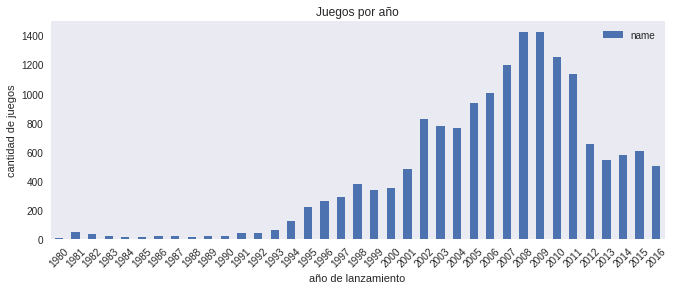

In [159]:
games_pivot.plot(kind='bar',figsize=(11,4))
plt.title('Juegos por año')
plt.xlabel('año de lanzamiento')
plt.ylabel('cantidad de juegos')
plt.xticks(rotation=45)
plt.show()

## Conclusión
Nuestro análisis contempla un rango de tiempo desde 1980 a 2016. siendo 2018 y 2019 los años que mas se vendieron juegos. El ciclo que contempla un apogeo de lanzamientos va desde 2001 2011.


## Descripción


In [160]:
games.head()

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38


In [161]:
plat_sales = games.pivot_table(index='platform',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)

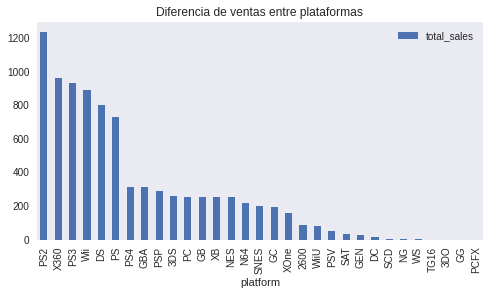

In [162]:
plt.style.use('seaborn-dark')
plat_sales.plot(kind='bar',figsize=(8,4))
plt.title('Diferencia de ventas entre plataformas')
plt.show()

## Conclusión
Según nos muestra el gráfico las plataformas con mayores ventas son (en orden descendiente) PS2, X box 360, PS3, Nintendo wii y Nintendo DS. A su vez pcfx, gg, 3do y tg16 las con menores ventas

In [163]:
plt.style.use('dark_background')

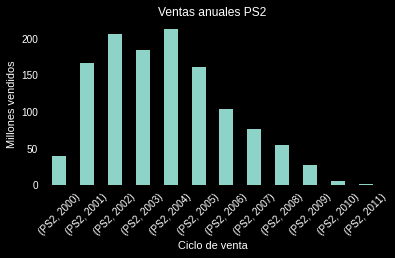

In [164]:
ps2 = games.query('platform == "PS2"')
ps2_stat = ps2.groupby(['platform','year_of_release'])['total_sales'].sum()
ps2_stat.plot(kind='bar',figsize=(6,3))
plt.title('Ventas anuales PS2')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()


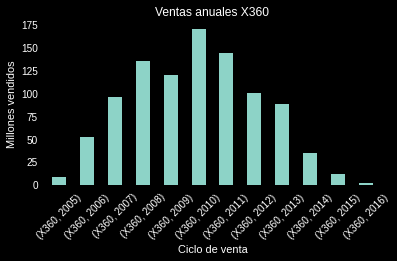

In [165]:
plt.style.use('dark_background')
x360 = games.query('platform == "X360"')
x360_stat = x360.groupby(['platform','year_of_release'])['total_sales'].sum()
x360_stat.plot(kind='bar',figsize=(6,3))
plt.title('Ventas anuales X360')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

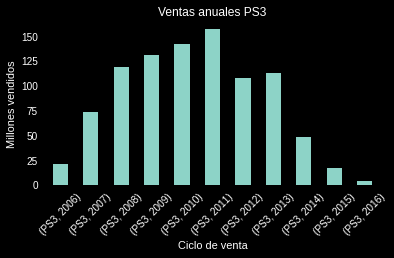

In [166]:
plt.style.use('dark_background')
ps3 = games.query('platform == "PS3"')
ps3_stat = ps3.groupby(['platform','year_of_release'])['total_sales'].sum()
ps3_stat.plot(kind='bar',figsize=(6,3))
plt.title('Ventas anuales PS3')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

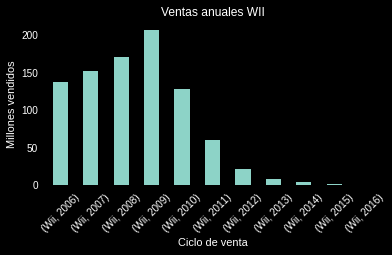

In [167]:
plt.style.use('dark_background')
wii = games.query('platform == "Wii"')
wii_stat = wii.groupby(['platform','year_of_release'])['total_sales'].sum()
wii_stat.plot(kind='bar',figsize=(6,3))
plt.title('Ventas anuales WII')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

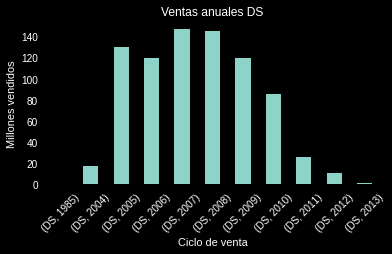

In [168]:
plt.style.use('dark_background')
ds = games.query('platform == "DS"')
ds_stat = ds.groupby(['platform','year_of_release'])['total_sales'].sum()
ds_stat.plot(kind='bar',figsize=(6,3))
plt.title('Ventas anuales DS')
plt.xlabel('Ciclo de venta')
plt.ylabel('Millones vendidos')
plt.xticks(rotation=45)
plt.show()

## Conclusión
Según nos muestran los diferentes gráficos el ciclo de mayores ventas para PS2 fue durante 2001 y 2005. Para Xbox 360 y PS3 fue durante 2007 y 2013 generando una de las grandes batallas dentro de la industria de video juegos. Por otro lado para la familia Nintendo (Wii y DS) su ciclo de venta entre 2006 y 2010 y 2005 y 2010 Respectivamente.
Tras analizar el ciclo de ventas de las consolas PS2,PS3,X360,Wii y DS si bien todas tienen tendencia a la baja por un tema obvio que es pasar de moda y levantar la venta de la nueva generación de consolas. si consideramos un rango de años entre 2006 y 2012 tanto las Psp como x360 mantuvieron sus tendencias sin embargo la familia nintend0 ( DS y Wii) cayeron bruscamente sus ventas.
Con respecto a cuanto tardan en aparecer y desaparecer las consolas tienen un boom de venta de 5 años aproximadamente y tardan un poco mas de 10 años en desaparecer.

In [169]:
# Desde que año hasta que año tenemos registro en nuestra base de datos
games['year_of_release'].min(),games['year_of_release'].max()

(1980, 2016)

In [170]:
# Peridod a elegir para seguir con nuestro análisis
period = games.query('year_of_release >= 2013 and year_of_release <= 2016')
period

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


## Conclusión 
El periodo seleccionado para profundizar en nuestro análisis es entre 2005 y 2011, esto por que en este periodo existió el mayor apogeo con respecto a ventas para todas las plataformas en general.

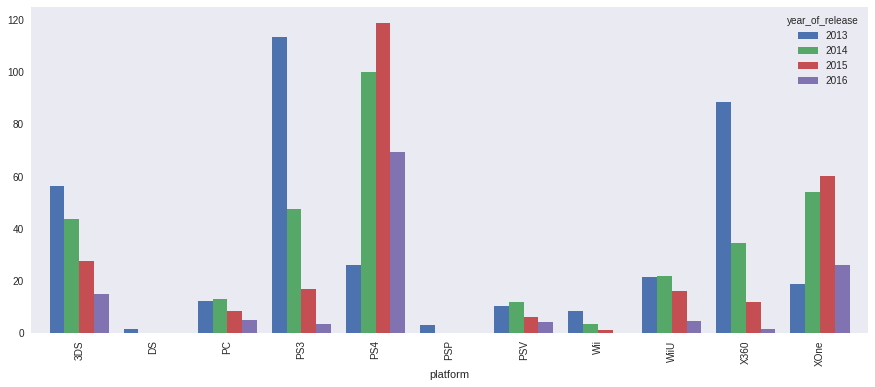

In [212]:
(period
     .pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar', grid=False, figsize=(15, 6), width=0.8)
);

## Conclusión
Las plataformas lideres en ventas para el periodo seleccionado son PS4, PS3 y X360.Con respecto a las plataformas potencialmente rentables se aprecia que Xone muestra un mercado al alza y Wiiu muestra una regularidad de venta durante un periodo de años.

In [172]:
period.head()

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


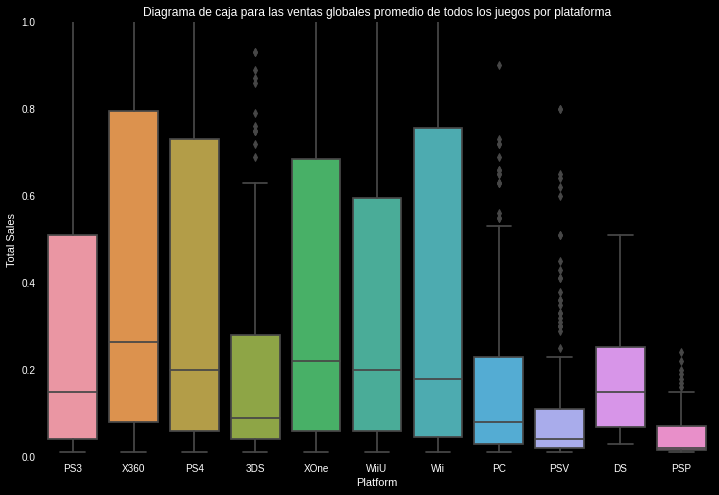

In [173]:
plt.figure(figsize=(12,8))
sns.boxplot(x='platform', y='total_sales', data=period)
plt.ylim(0, 1)
plt.title('Diagrama de caja para las ventas globales promedio de todos los juegos por plataforma')
plt.xlabel('Platform')
plt.ylabel('Total Sales');

In [174]:
period.groupby('platform')['total_sales'].mean()

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64

## Conclusión
Tras analizar el gráfico de caja Podemos ver que la plataforma X360 tiene una media más alta durante el año que otras plataformas. También podemos observar que las diferencias en las ventas también son significativas. En general, podemos concluir que la x360 tiene más ventas que cualquier otra plataforma.

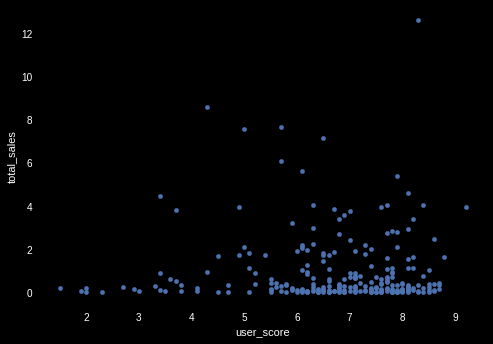

In [175]:
period.query('platform == "PS4"').plot(x='user_score', y='total_sales', kind='scatter');

In [176]:
user_corr = period.query('platform == "PS4"')
print(user_corr['user_score'].corr(user_corr['total_sales']))

-0.031957110204556424


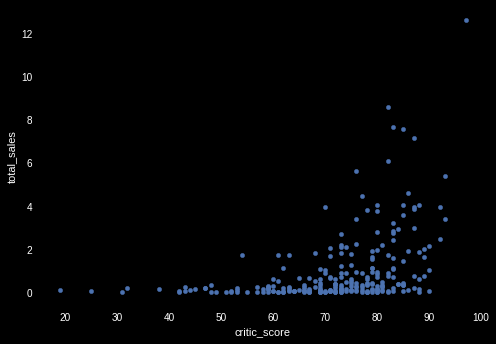

In [177]:
period.query('platform == "PS4"').plot(x='critic_score', y='total_sales', kind='scatter');

In [178]:
critic_score = period.query('platform == "PS4"')
print(critic_score['critic_score'].corr(critic_score['total_sales']))

0.40656790206178095


## Conclusión
Según muestran los gráficos y ratifican los cálculos de correlación, Se puede decir que "no existe correlación" para `user_score` y las ventas, porque el cálculo es muy cercano a cero (-0.03).Para la variable `critic_score` si existe relación dado que es una correlación de 0.4 positiva, esto indica que si hay una voluntad de compra en base a las calificaciones de los críticos.

In [179]:
# tabla para realizar análisis en base a consola y genero especifico
period.query('platform == "PS4" and genre =="Action"')

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
225,The Last of Us,PS4,2014,Action,1.88,2.00,0.07,0.77,NaN,NaN,RP,4.72
231,Uncharted: The Nathan Drake Collection,PS4,2015,Action,2.07,1.71,0.08,0.76,86.0,8.1,T,4.62
295,Watch Dogs,PS4,2014,Action,1.40,1.90,0.11,0.64,80.0,6.3,M,4.05
304,Assassin's Creed: Unity,PS4,2014,Action,1.19,2.07,0.08,0.62,70.0,4.9,M,3.96
...,...,...,...,...,...,...,...,...,...,...,...,...
16113,Republique,PS4,2016,Action,0.00,0.01,0.01,0.00,72.0,5.8,M,0.02
16362,Crows: Burning Edge,PS4,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01
16486,Super Dungeon Bros,PS4,2016,Action,0.01,0.00,0.00,0.00,42.0,2.3,E10+,0.01
16496,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,RP,0.01


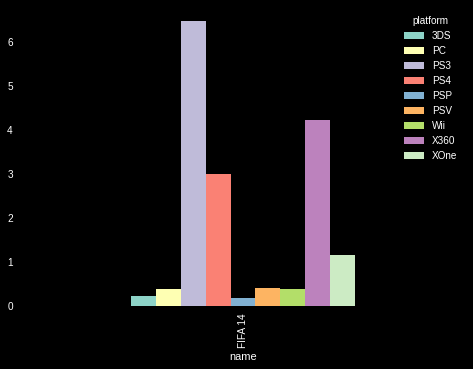

In [180]:
(period
     .query('name == "FIFA 14"')
     .pivot_table(index='name',columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
);

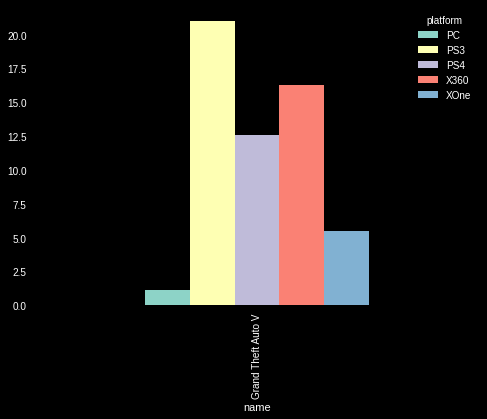

In [181]:
(period
     .query('name == "Grand Theft Auto V"')
     .pivot_table(index='name',columns='platform', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
);

## Conclusión
Tomamos como muestra 2 de los juegos mas populares de últimos años como son Fifa 14 y Grand Theft Auto. Para Fifa sus ventas se sostienen principalmente en las consolas X360,PS3 y PS4. Por otra parte para Grand Theft Auto V, sus ventas recaen en PS3,X360 y PS4.

In [182]:
plt.style.use('seaborn')

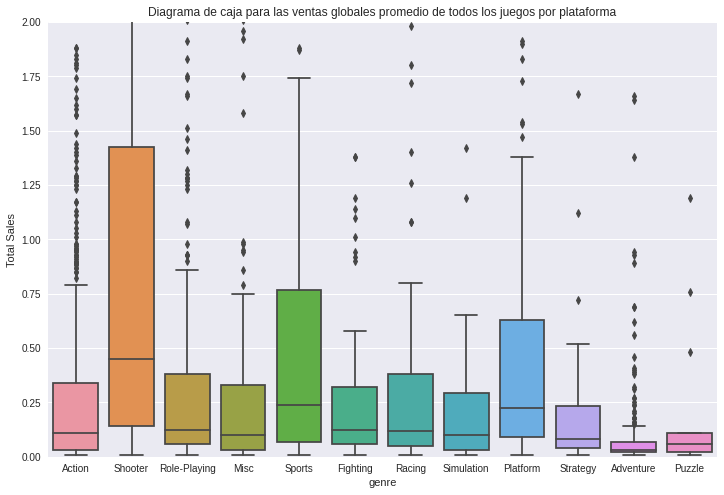

In [183]:
plt.figure(figsize=(12,8))
sns.boxplot(x='genre', y='total_sales', data=period)
plt.ylim(0, 2)
plt.title('Diagrama de caja para las ventas globales promedio de todos los juegos por plataforma')
plt.xlabel('genre')
plt.ylabel('Total Sales');

In [184]:
period.groupby('genre')['total_sales'].mean()

genre
Action          0.420196
Adventure       0.096490
Fighting        0.441375
Misc            0.405290
Platform        0.576081
Puzzle          0.186471
Racing          0.469294
Role-Playing    0.499623
Shooter         1.245882
Simulation      0.350968
Sports          0.703972
Strategy        0.180000
Name: total_sales, dtype: float64

## Conclusión
No cabe duda que los géneros que generan mas adeptos entre los usuarios son Shooter, Sport y Platform. Esto se logra deducir sacando el promedio de ventas por género. Siguiendo la misma linea los juegos con menor promedio de venta son, Puzzle, Strategy y Adventure.

# Etapa 4.Crear un perfil de usuario para cada región

In [185]:
period.head()

,name,platform,year_of_release,genre,usa_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,RP,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,RP,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


## Región JP

In [186]:
jp_region = period.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_jp = jp_region.head()

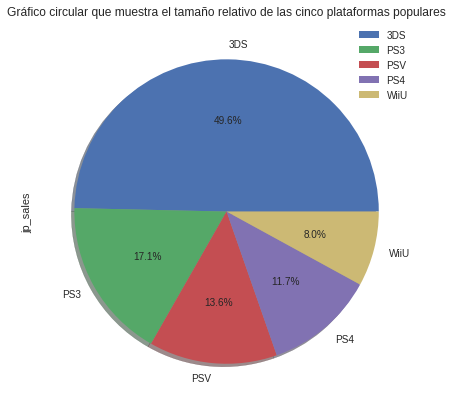

In [187]:
(top_5_jp
     .pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

## Región USA

In [188]:
usa_region = period.groupby(['platform'])['usa_sales'].sum().reset_index().sort_values(by='usa_sales', ascending = False)
top_5_usa = usa_region.head()

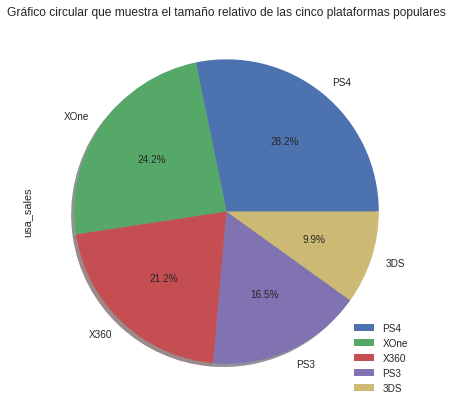

In [189]:
(top_5_usa
     .pivot_table(index='platform', values='usa_sales', aggfunc='sum').sort_values(by='usa_sales',ascending=False)
     .plot(y='usa_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

## Región EU

In [190]:
eu_region = period.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_eu = eu_region.head()

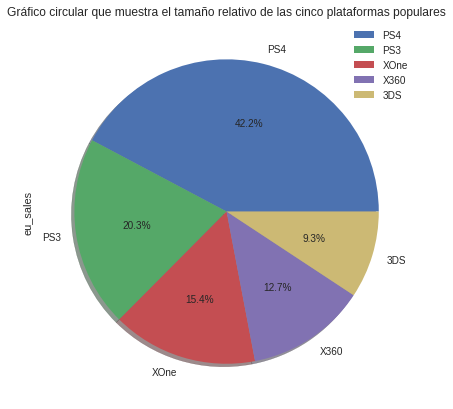

In [191]:
(top_5_eu
     .pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de las cinco plataformas populares', 
                      figsize=(7, 7), autopct='%1.1f%%', shadow=True)
);

## Conclusión
Observamos varias variaciones en las cuotas de mercado en las cinco plataformas principales de una región a otra. En la región USA, Ps4 tiene la mayor cuota de mercado. En la región de la UE, PS4 tiene la mayor cuota de mercado. En la región de JP, el 3DS es el rey. Claramente existe un mayor atractivo por los juegos de niños.

## Top 5 generos

In [192]:
new_data_genre = period.groupby(['genre'])['usa_sales'].sum().reset_index().sort_values(by='usa_sales', ascending = False)
top_5_genre_ot = new_data_genre.head()
top_5_genre_ot.reset_index(drop=True)


,genre,usa_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


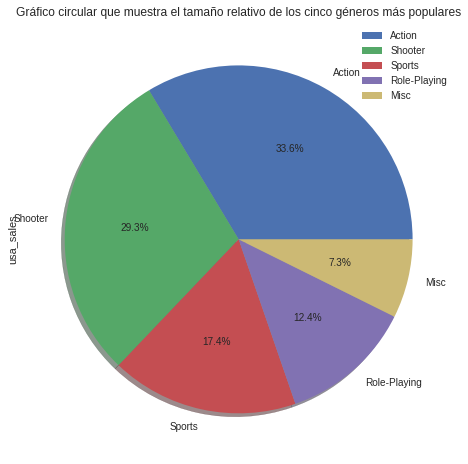

In [193]:
(top_5_genre_ot
     .pivot_table(index='genre', values='usa_sales', aggfunc='sum').sort_values(by='usa_sales',ascending=False)
     .plot(y='usa_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

## Conclusión
Para la región de usa el género que se lleva la mayor parte de las ventas es acción, seguido de Shooters.

In [194]:
new_data_genre = period.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
top_5_genre_eu = new_data_genre.head()
top_5_genre_eu.reset_index(drop=True)


,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


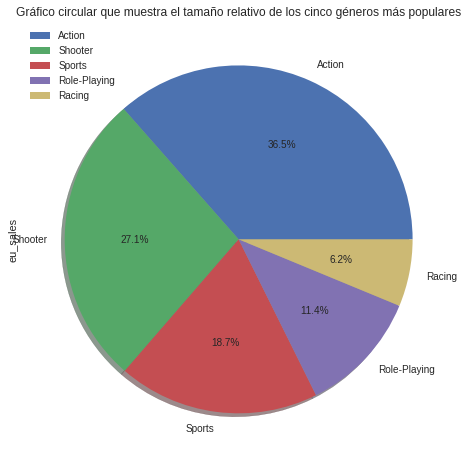

In [195]:
(top_5_genre_eu
     .pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

## Conclusión
El Publico europeo también muestra un fanatismo similar al de la región de usa, teniendo como a sus preferidos a acción y shotters. eso si con un número menor de ventas.

In [196]:
new_data_genre = period.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
top_5_genre_jp = new_data_genre.head()
top_5_genre_jp.reset_index(drop=True)

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


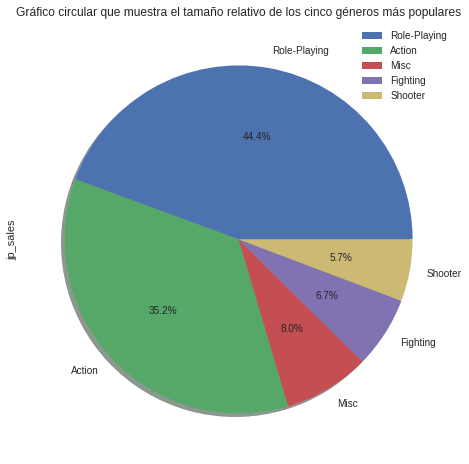

In [197]:
(top_5_genre_jp
     .pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular que muestra el tamaño relativo de los cinco géneros más populares', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

## Conclusión
El público asiáticos tiene gustos totalmente distintos ya que su preferencia en primer lugar es para los juegos de rol seguido de acción.


## Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [198]:
new_data_ratings_ot = period.groupby(['rating'])['other_sales'].sum().reset_index().sort_values(by='other_sales', ascending = False)
new_data_ratings_ot = new_data_ratings_ot.reset_index(drop=True)
new_data_ratings_ot


,rating,other_sales
0,M,47.04
1,RP,23.46
2,E,22.61
3,T,14.29
4,E10+,12.57


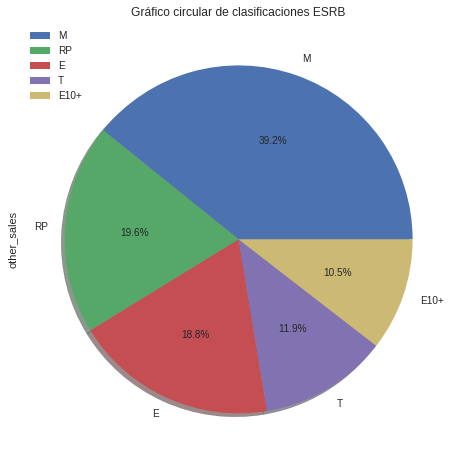

In [199]:
(new_data_ratings_ot
     .pivot_table(index='rating', values='other_sales', aggfunc='sum').sort_values(by='other_sales',ascending=False)
     .plot(y='other_sales',kind='pie',title = 'Gráfico circular de clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [200]:
new_data_ratings_jp = period.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending = False)
new_data_ratings_jp = new_data_ratings_jp.reset_index(drop=True)
new_data_ratings_jp


,rating,jp_sales
0,RP,85.05
1,T,20.59
2,E,15.14
3,M,14.11
4,E10+,5.89


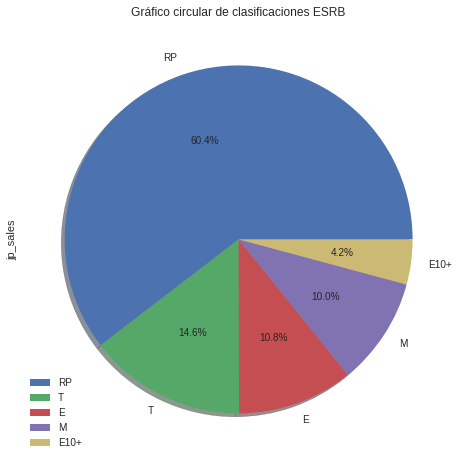

In [201]:
(new_data_ratings_jp
     .pivot_table(index='rating', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)
     .plot(y='jp_sales',kind='pie',title = 'Gráfico circular de clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [202]:
new_data_ratings_usa = period.groupby(['rating'])['usa_sales'].sum().reset_index().sort_values(by='usa_sales', ascending = False)
new_data_ratings_usa = new_data_ratings_usa.reset_index(drop=True)
new_data_ratings_usa


,rating,usa_sales
0,M,165.21
1,RP,89.42
2,E,79.05
3,E10+,54.24
4,T,49.79


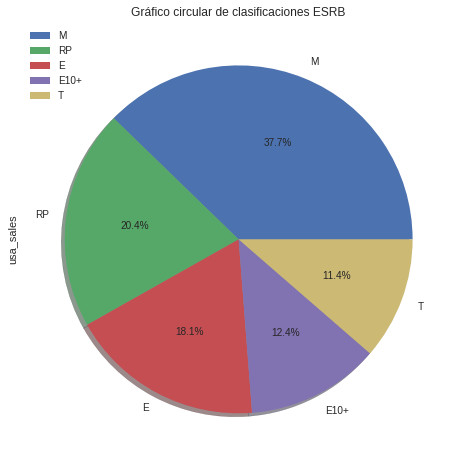

In [203]:
(new_data_ratings_usa
     .pivot_table(index='rating', values='usa_sales', aggfunc='sum').sort_values(by='usa_sales',ascending=False)
     .plot(y='usa_sales',kind='pie',title = 'Gráfico circular de clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

In [204]:
new_data_ratings_eu = period.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending = False)
new_data_ratings_eu = new_data_ratings_eu.reset_index(drop=True)
new_data_ratings_eu


,rating,eu_sales
0,M,145.32
1,E,83.36
2,RP,78.91
3,E10+,42.69
4,T,41.95


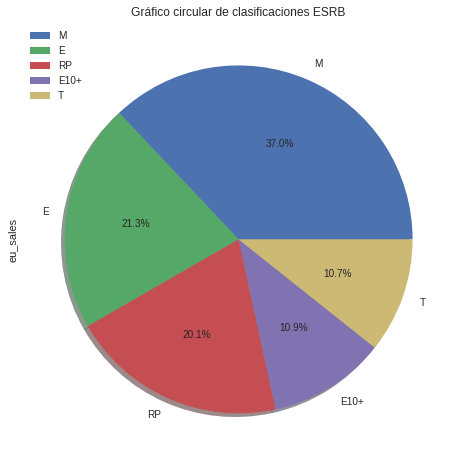

In [205]:
(new_data_ratings_eu
     .pivot_table(index='rating', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False)
     .plot(y='eu_sales',kind='pie',title = 'Gráfico circular de clasificaciones ESRB', 
                      figsize=(8, 8), autopct='%1.1f%%', shadow=True)
);

# Conclusión
En un aspecto general la preferencia a nivel mundial esta en títulos destinados para mayores de 18. pero cabe señalar que la región JP tiene una gran cantidad de juegos sin calcificar. 

## Etapa 5.Probar hipotesis

#### Hipótesis nula H₀ = Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#### Hipótesis alternativa, H₁ =  Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.


In [206]:
xone = period.query('platform == "XOne"')
pc = period.query('platform == "PC"')

In [207]:
vari_xone = np.var(xone.user_score)
vari_pc   = np.var(pc.user_score)
print(vari_xone)
print('---------------------------------------')
print(vari_pc)

1.8965188383045526
---------------------------------------
3.01630634755463


In [208]:
xone_va = xone.user_score
pc_va =  pc.user_score

alpha = 0.05 

results =st.ttest_ind(pc_va, xone_va, equal_var = False, nan_policy='omit') 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.1475959401343003
No rechazamos la hipótesis nula


## Conclusión
Formulamos la hipótesis nula al afirmar que no hay diferencia entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC. Utilizamos un nivel de significación de 0,05. Dado que el valor p es mayor que = 0,05, no podemos rechazar la hipótesis nula. La evidencia sugiere que no existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios de las plataformas Xbox One y PC, es decir, las calificaciones promedio de los usuarios de Xbox One y las calificaciones promedio de los usuarios de las plataformas PC son las mismas.

#### Hipótesis nula H₀ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
#### Hipótesis alternativa, H₁ = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son iguales.


In [209]:
accion = period.query('genre == "Action"')
sports = period.query('genre == "Sports"')

In [210]:
vari_acc = np.var(accion.user_score)
vari_sport   = np.var(sports.user_score)
print(vari_acc)
print('---------------------------------------')
print(vari_sport)

1.7648124186332366
---------------------------------------
3.160733984375


In [211]:
accion_mean = accion['user_score']
sports_mean =  sports['user_score']


alpha = 0.05 

results =st.ttest_ind(accion_mean, sports_mean, equal_var = False ,nan_policy='omit') 
print('p-value:', results.pvalue) 

if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 1.446003970070351e-20
Rechazamos la hipótesis nula


## Conclusión
Formulamos la hipótesis nula al afirmar que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales. Utilizamos un nivel de significación de 0,05. Dado que el valor p es menor que = 0.05, rechazamos la hipótesis nula. Nuestro análisis sugiere que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los usuarios para los géneros de Acción y Deportes.

# Conclusión final
Tras realizar la visualización general de los datos nos percatamos de valores nulos y errores de formato en varias columnas.

Luego realizamos las manipulación de los datos tomando determinaciones de no imputar los datos en las columnas cuantitativas dado que existe un alto porcentaje de datos nan. Las columnas cuantitativas no mostraban valores atípicos, también reformulamos distintas afirmaciones para las columnas categóricas, como eliminación de datos al ser de pequeña cantidad y relevancia.
Pasando al análisis de datos podemos destacar resumidamente que las consolas de la familia playstation y la familia nintendo sumando a x360. son las plataformas con mas ventas y relevancia dentro del análisis, que a su vez los géneros de shooter y acción son los mas vendidos y que no existen grandes diferencias de gustos entre regiones.

Finalmente realizamos una prueba de hipótesis para determinar si las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas. Nuestra prueba confirma que las calificaciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas. También probamos para ver si la calificación promedio de los usuarios para el género Acción y Deportes son iguales. Nuestro resultado del análisis sugiere que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes
